# Earthquake


An earthquake is a natural phenomenon that occurs when the Earth's tectonic plates shift and release energy.
This energy is transmitted through the Earth's crust in the form of seismic waves, which can cause the ground to shake, rupture the Earth's surface and result in the displacement of the surrounding rocls and soil.



## Magnitude of an Earthquake


The magnitude of an earthquake is a measure of the energy released by the earthquake at its source. It is calculated using the Richter scale or the moment magnitude scale, both of which are logarithmic scales.

An earthquake with a magnitude of 7.0 is ten times more powerful than one with a magnitude of 6.0 and 32 times more powerful than one with a magnitude of 5.0.



#### How earthquake actually is studied? Have a look at it.

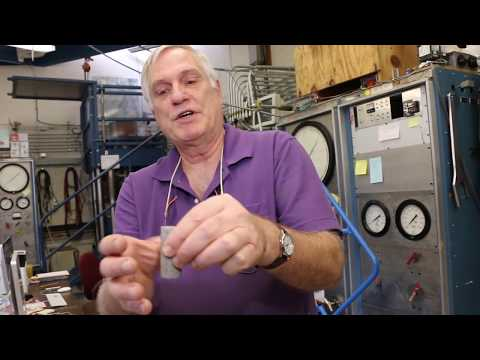

In [274]:
from IPython.display import YouTubeVideo
YouTubeVideo('m_dBwwDJ4uo')

#play at 2:40  

Earthquakes are one of the most dangerous natural disasters, primarily due to the fact that they often occur without an explicit warning, leaving no time to react. 

This fact makes the problem of earthquake prediction extremely important for the safety of humankind.

Despite the continuing interest in this topic from the scientific community, there is no consensus as to whether it is possible to find the solution with sufficient accuracy. 

However, successful application of machine learning techniques to different fields of research indicates that it would be possible to use them to make more accurate short-term forecast.


## Exploratory Data Analysis


In [275]:
# import the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure,show
from seaborn import countplot
%matplotlib inline
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
import plotly.graph_objects as go

In [276]:
eq= pd.read_csv('world1.csv')
eq

time  latitude  longitude    depth  mag magType  \
0      2023-01-31T21:51:19.853Z  -18.8950   -69.9048  111.094  4.2      mb   
1      2023-01-31T20:35:33.770Z  -25.3566  -177.4018  174.937  4.3      mb   
2      2023-01-31T20:32:41.243Z  -16.6312   168.2143   10.000  4.5      mb   
3      2023-01-31T20:04:35.543Z    9.0601   127.1036   10.000  4.8     mww   
4      2023-01-31T20:03:24.993Z  -16.6390   168.2483   10.000  4.6      mb   
...                         ...       ...        ...      ...  ...     ...   
18609  2022-01-01T03:34:34.373Z   51.1975   157.8335   68.200  4.6      mb   
18610  2022-01-01T02:51:57.266Z   54.3998   170.6075   10.000  4.0      mb   
18611  2022-01-01T02:17:56.815Z   38.7251    73.4827  105.790  4.2      mb   
18612  2022-01-01T00:10:28.735Z   -8.7633   124.3513  104.900  4.1      mb   
18613  2022-01-01T00:02:24.512Z  -17.0269  -174.2142   60.870  4.6      mb   

         nst    gap   dmin   rms  ...                   updated  \
0       24.0  115.0  0.489  0.55  ...  2023-04-13T21:53:14.040Z   
1        8.0  160.0  3.917  0.47  ...  2023-04-13T21:53:26.040Z   
2       12.0  128.0  1.527  0.50  ...  2023-04-13T21:53:26.040Z   
3      150.0   67.0  2.488  0.57  ...  2023-04-13T21:53:14.040Z   
4       23.0  138.0  1.554  0.84  ...  2023-04-13T21:53:26.040Z   
...      ...    ...    ...   ...  ...                       ...   
18609    NaN  111.0  1.896  0.71  ...  2022-03-12T22:18:59.040Z   
18610    NaN  138.0  2.671  1.06  ...  2022-03-12T22:19:16.040Z   
18611    NaN   95.0  1.509  1.01  ...  2022-03-12T22:18:59.040Z   
18612    NaN   68.0  0.989  0.69  ...  2022-03-12T22:18:59.040Z   
18613    NaN   85.0  3.886  0.17  ...  2022-03-12T22:19:16.040Z   

                                       place        type horizontalError  \
0                            Tarapaca, Chile  earthquake            5.13   
1                  south of the Fiji Islands  earthquake           23.96   
2             103 km SE of Lakatoro, Vanuatu  earthquake            6.87   
3        89 km ENE of Aras-asan, Philippines  earthquake            8.32   
4             107 km SE of Lakatoro, Vanuatu  earthquake           10.17   
...                                      ...         ...             ...   
18609       98 km ESE of Ozernovskiy, Russia  earthquake            9.10   
18610      242 km NW of Attu Station, Alaska  earthquake           12.70   
18611        74 km NW of Murghob, Tajikistan  earthquake            6.40   
18612  48 km N of Pante Makasar, Timor Leste  earthquake            6.70   
18613            126 km SSW of Hihifo, Tonga  earthquake           12.60   

      depthError  magError  magNst    status  locationSource magSource  
0          5.891     0.147    13.0  reviewed              us        us  
1         47.878     0.266     4.0  reviewed              us        us  
2          1.939     0.243     5.0  reviewed              us        us  
3          1.752     0.089    12.0  reviewed              us        us  
4          1.929     0.158    14.0  reviewed              us        us  
...          ...       ...     ...       ...             ...       ...  
18609      6.200     0.045   151.0  reviewed              us        us  
18610      1.900     0.259     4.0  reviewed              us        us  
18611      8.300     0.153    13.0  reviewed              us        us  
18612      8.400     0.197     7.0  reviewed              us        us  
18613      6.400     0.273     4.0  reviewed              us        us  

[18614 rows x 22 columns]

In [277]:
eq.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                5702
gap                 239
dmin                305
rms                   1
net                   0
id                    0
updated               0
place               858
type                  0
horizontalError     261
depthError            1
magError            448
magNst              364
status                0
locationSource        0
magSource             0
dtype: int64

In [278]:
eq['mag'] = eq['mag'].fillna(eq['mag'].median())
eq['nst'] = eq['nst'].fillna(eq['nst'].median())
eq['gap'] = eq['gap'].fillna(eq['gap'].median())
eq['dmin'] = eq['dmin'].fillna(eq['dmin'].median())
eq['rms'] = eq['rms'].fillna(eq['rms'].median())
eq['horizontalError'] = eq['horizontalError'].fillna(eq['horizontalError'].median())
eq['depthError'] = eq['depthError'].fillna(eq['depthError'].median())
eq['magError'] = eq['magError'].fillna(eq['magError'].median())
eq['magNst'] = eq['magNst'].fillna(eq['magNst'].median())

In [279]:
eq.isnull().sum()

time                 0
latitude             0
longitude            0
depth                0
mag                  0
magType              0
nst                  0
gap                  0
dmin                 0
rms                  0
net                  0
id                   0
updated              0
place              858
type                 0
horizontalError      0
depthError           0
magError             0
magNst               0
status               0
locationSource       0
magSource            0
dtype: int64

In [280]:
eq['place'] = eq['place'].astype(str)
eq["place"].value_counts()

nan                                     858
South Sandwich Islands region           575
south of the Fiji Islands               382
Reykjanes Ridge                         313
Kermadec Islands region                 306
                                       ... 
41 km NW of Pedernales, Ecuador           1
92 km SSW of Banjar, Indonesia            1
34 km WSW of Ashk?sham, Afghanistan       1
258 km S of Kokopo, Papua New Guinea      1
126 km SSW of Hihifo, Tonga               1
Name: place, Length: 11250, dtype: int64

In [281]:
eq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18614 entries, 0 to 18613
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             18614 non-null  object 
 1   latitude         18614 non-null  float64
 2   longitude        18614 non-null  float64
 3   depth            18614 non-null  float64
 4   mag              18614 non-null  float64
 5   magType          18614 non-null  object 
 6   nst              18614 non-null  float64
 7   gap              18614 non-null  float64
 8   dmin             18614 non-null  float64
 9   rms              18614 non-null  float64
 10  net              18614 non-null  object 
 11  id               18614 non-null  object 
 12  updated          18614 non-null  object 
 13  place            18614 non-null  object 
 14  type             18614 non-null  object 
 15  horizontalError  18614 non-null  float64
 16  depthError       18614 non-null  float64
 17  magError    

In [282]:
eq.describe()

latitude     longitude         depth           mag           nst  \
count  18614.000000  18614.000000  18614.000000  18614.000000  18614.000000   
mean       5.226883     19.519367     82.886063      4.450670     43.414688   
std       30.313161    124.730112    135.838280      0.428958     33.094949   
min      -69.773900   -179.999700     -3.740000      3.500000      3.000000   
25%      -18.314600    -80.399250     10.000000      4.200000     26.000000   
50%        2.762250     62.812000     24.988000      4.400000     34.000000   
75%       29.195575    129.749000     90.847500      4.600000     46.000000   
max       86.647700    179.998100    664.700000      7.600000    452.000000   

                gap          dmin           rms  horizontalError  \
count  18614.000000  18614.000000  18614.000000     18614.000000   
mean     106.892942      3.806682      0.658683         8.270533   
std       51.785042      4.868678      0.233364         3.379392   
min       10.000000      0.000000      0.000000         0.080000   
25%       70.000000      1.116250      0.500000         6.000000   
50%      100.000000      2.274000      0.640000         8.020000   
75%      133.000000      4.451000      0.810000        10.400000   
max      353.000000     52.919000      2.820000        37.250000   

         depthError      magError        magNst  
count  18614.000000  18614.000000  18614.000000  
mean       4.607496      0.123990     36.214086  
std        3.833292      0.061459     53.960422  
min        0.000000      0.000000      0.000000  
25%        1.900000      0.080000     11.000000  
50%        2.796000      0.115000     19.000000  
75%        6.800000      0.157000     38.000000  
max       54.600000      1.370000    761.000000

<AxesSubplot:>

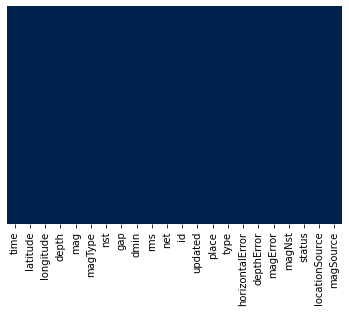

In [283]:
sns.heatmap(eq.isnull(),yticklabels=False,cbar=False,cmap='cividis')

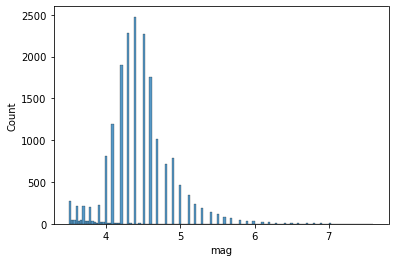

In [284]:
#plot the histogram of the target variable
sns.histplot(eq['mag'])
plt.show()

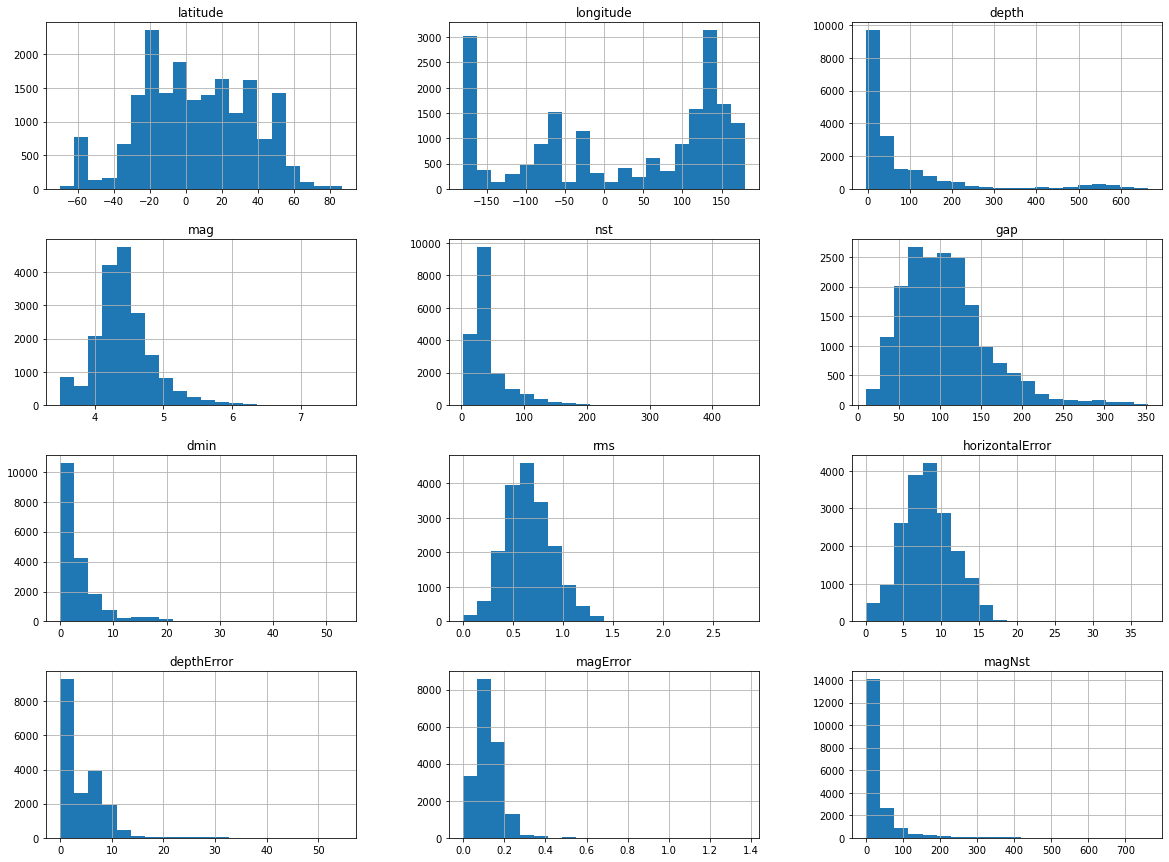

In [285]:
eq.hist (bins=20, figsize=(20,15))
plt.show()

array([[<AxesSubplot:title={'center':'mag'}>]], dtype=object)

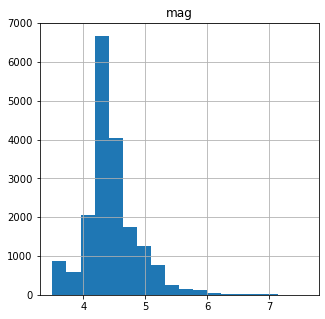

In [286]:
eq.hist ("mag", bins=18, figsize=(5,5))

In [287]:
#dropping the irrelavant columns
eq.drop(columns=['horizontalError', 'dmin', 'nst', 'magError'])

time  latitude  longitude    depth  mag magType  \
0      2023-01-31T21:51:19.853Z  -18.8950   -69.9048  111.094  4.2      mb   
1      2023-01-31T20:35:33.770Z  -25.3566  -177.4018  174.937  4.3      mb   
2      2023-01-31T20:32:41.243Z  -16.6312   168.2143   10.000  4.5      mb   
3      2023-01-31T20:04:35.543Z    9.0601   127.1036   10.000  4.8     mww   
4      2023-01-31T20:03:24.993Z  -16.6390   168.2483   10.000  4.6      mb   
...                         ...       ...        ...      ...  ...     ...   
18609  2022-01-01T03:34:34.373Z   51.1975   157.8335   68.200  4.6      mb   
18610  2022-01-01T02:51:57.266Z   54.3998   170.6075   10.000  4.0      mb   
18611  2022-01-01T02:17:56.815Z   38.7251    73.4827  105.790  4.2      mb   
18612  2022-01-01T00:10:28.735Z   -8.7633   124.3513  104.900  4.1      mb   
18613  2022-01-01T00:02:24.512Z  -17.0269  -174.2142   60.870  4.6      mb   

         gap   rms net          id                   updated  \
0      115.0  0.55  us  us6000jkld  2023-04-13T21:53:14.040Z   
1      160.0  0.47  us  us6000jmaa  2023-04-13T21:53:26.040Z   
2      128.0  0.50  us  us6000jma4  2023-04-13T21:53:26.040Z   
3       67.0  0.57  us  us6000jkkr  2023-04-13T21:53:14.040Z   
4      138.0  0.84  us  us6000jmab  2023-04-13T21:53:26.040Z   
...      ...   ...  ..         ...                       ...   
18609  111.0  0.71  us  us7000g89r  2022-03-12T22:18:59.040Z   
18610  138.0  1.06  us  us7000gbch  2022-03-12T22:19:16.040Z   
18611   95.0  1.01  us  us7000g89l  2022-03-12T22:18:59.040Z   
18612   68.0  0.69  us  us7000g896  2022-03-12T22:18:59.040Z   
18613   85.0  0.17  us  us7000gbcd  2022-03-12T22:19:16.040Z   

                                       place        type  depthError  magNst  \
0                            Tarapaca, Chile  earthquake       5.891    13.0   
1                  south of the Fiji Islands  earthquake      47.878     4.0   
2             103 km SE of Lakatoro, Vanuatu  earthquake       1.939     5.0   
3        89 km ENE of Aras-asan, Philippines  earthquake       1.752    12.0   
4             107 km SE of Lakatoro, Vanuatu  earthquake       1.929    14.0   
...                                      ...         ...         ...     ...   
18609       98 km ESE of Ozernovskiy, Russia  earthquake       6.200   151.0   
18610      242 km NW of Attu Station, Alaska  earthquake       1.900     4.0   
18611        74 km NW of Murghob, Tajikistan  earthquake       8.300    13.0   
18612  48 km N of Pante Makasar, Timor Leste  earthquake       8.400     7.0   
18613            126 km SSW of Hihifo, Tonga  earthquake       6.400     4.0   

         status locationSource magSource  
0      reviewed             us        us  
1      reviewed             us        us  
2      reviewed             us        us  
3      reviewed             us        us  
4      reviewed             us        us  
...         ...            ...       ...  
18609  reviewed             us        us  
18610  reviewed             us        us  
18611  reviewed             us        us  
18612  reviewed             us        us  
18613  reviewed             us        us  

[18614 rows x 18 columns]

In [288]:
# feature engineering
eq.describe().transpose()

count        mean         std       min       25%  \
latitude         18614.0    5.226883   30.313161  -69.7739 -18.31460   
longitude        18614.0   19.519367  124.730112 -179.9997 -80.39925   
depth            18614.0   82.886063  135.838280   -3.7400  10.00000   
mag              18614.0    4.450670    0.428958    3.5000   4.20000   
nst              18614.0   43.414688   33.094949    3.0000  26.00000   
gap              18614.0  106.892942   51.785042   10.0000  70.00000   
dmin             18614.0    3.806682    4.868678    0.0000   1.11625   
rms              18614.0    0.658683    0.233364    0.0000   0.50000   
horizontalError  18614.0    8.270533    3.379392    0.0800   6.00000   
depthError       18614.0    4.607496    3.833292    0.0000   1.90000   
magError         18614.0    0.123990    0.061459    0.0000   0.08000   
magNst           18614.0   36.214086   53.960422    0.0000  11.00000   

                       50%         75%       max  
latitude           2.76225   29.195575   86.6477  
longitude         62.81200  129.749000  179.9981  
depth             24.98800   90.847500  664.7000  
mag                4.40000    4.600000    7.6000  
nst               34.00000   46.000000  452.0000  
gap              100.00000  133.000000  353.0000  
dmin               2.27400    4.451000   52.9190  
rms                0.64000    0.810000    2.8200  
horizontalError    8.02000   10.400000   37.2500  
depthError         2.79600    6.800000   54.6000  
magError           0.11500    0.157000    1.3700  
magNst            19.00000   38.000000  761.0000

In [289]:
# getting the date out of the data
def date_split(updated):
    return updated.split('T')[0]

eq['date'] = eq['updated'].apply(lambda x: f"{date_split(x)}")
eq

time  latitude  longitude    depth  mag magType  \
0      2023-01-31T21:51:19.853Z  -18.8950   -69.9048  111.094  4.2      mb   
1      2023-01-31T20:35:33.770Z  -25.3566  -177.4018  174.937  4.3      mb   
2      2023-01-31T20:32:41.243Z  -16.6312   168.2143   10.000  4.5      mb   
3      2023-01-31T20:04:35.543Z    9.0601   127.1036   10.000  4.8     mww   
4      2023-01-31T20:03:24.993Z  -16.6390   168.2483   10.000  4.6      mb   
...                         ...       ...        ...      ...  ...     ...   
18609  2022-01-01T03:34:34.373Z   51.1975   157.8335   68.200  4.6      mb   
18610  2022-01-01T02:51:57.266Z   54.3998   170.6075   10.000  4.0      mb   
18611  2022-01-01T02:17:56.815Z   38.7251    73.4827  105.790  4.2      mb   
18612  2022-01-01T00:10:28.735Z   -8.7633   124.3513  104.900  4.1      mb   
18613  2022-01-01T00:02:24.512Z  -17.0269  -174.2142   60.870  4.6      mb   

         nst    gap   dmin   rms  ...                                  place  \
0       24.0  115.0  0.489  0.55  ...                        Tarapaca, Chile   
1        8.0  160.0  3.917  0.47  ...              south of the Fiji Islands   
2       12.0  128.0  1.527  0.50  ...         103 km SE of Lakatoro, Vanuatu   
3      150.0   67.0  2.488  0.57  ...    89 km ENE of Aras-asan, Philippines   
4       23.0  138.0  1.554  0.84  ...         107 km SE of Lakatoro, Vanuatu   
...      ...    ...    ...   ...  ...                                    ...   
18609   34.0  111.0  1.896  0.71  ...       98 km ESE of Ozernovskiy, Russia   
18610   34.0  138.0  2.671  1.06  ...      242 km NW of Attu Station, Alaska   
18611   34.0   95.0  1.509  1.01  ...        74 km NW of Murghob, Tajikistan   
18612   34.0   68.0  0.989  0.69  ...  48 km N of Pante Makasar, Timor Leste   
18613   34.0   85.0  3.886  0.17  ...            126 km SSW of Hihifo, Tonga   

             type horizontalError depthError magError  magNst    status  \
0      earthquake            5.13      5.891    0.147    13.0  reviewed   
1      earthquake           23.96     47.878    0.266     4.0  reviewed   
2      earthquake            6.87      1.939    0.243     5.0  reviewed   
3      earthquake            8.32      1.752    0.089    12.0  reviewed   
4      earthquake           10.17      1.929    0.158    14.0  reviewed   
...           ...             ...        ...      ...     ...       ...   
18609  earthquake            9.10      6.200    0.045   151.0  reviewed   
18610  earthquake           12.70      1.900    0.259     4.0  reviewed   
18611  earthquake            6.40      8.300    0.153    13.0  reviewed   
18612  earthquake            6.70      8.400    0.197     7.0  reviewed   
18613  earthquake           12.60      6.400    0.273     4.0  reviewed   

       locationSource  magSource        date  
0                  us         us  2023-04-13  
1                  us         us  2023-04-13  
2                  us         us  2023-04-13  
3                  us         us  2023-04-13  
4                  us         us  2023-04-13  
...               ...        ...         ...  
18609              us         us  2022-03-12  
18610              us         us  2022-03-12  
18611              us         us  2022-03-12  
18612              us         us  2022-03-12  
18613              us         us  2022-03-12  

[18614 rows x 23 columns]

In [290]:
# getting the year out of the data
def get_year(date):
    return date.split('-')[0]

eq['year'] = eq['date'].apply(lambda x: f"{get_year(x)}")
eq

time  latitude  longitude    depth  mag magType  \
0      2023-01-31T21:51:19.853Z  -18.8950   -69.9048  111.094  4.2      mb   
1      2023-01-31T20:35:33.770Z  -25.3566  -177.4018  174.937  4.3      mb   
2      2023-01-31T20:32:41.243Z  -16.6312   168.2143   10.000  4.5      mb   
3      2023-01-31T20:04:35.543Z    9.0601   127.1036   10.000  4.8     mww   
4      2023-01-31T20:03:24.993Z  -16.6390   168.2483   10.000  4.6      mb   
...                         ...       ...        ...      ...  ...     ...   
18609  2022-01-01T03:34:34.373Z   51.1975   157.8335   68.200  4.6      mb   
18610  2022-01-01T02:51:57.266Z   54.3998   170.6075   10.000  4.0      mb   
18611  2022-01-01T02:17:56.815Z   38.7251    73.4827  105.790  4.2      mb   
18612  2022-01-01T00:10:28.735Z   -8.7633   124.3513  104.900  4.1      mb   
18613  2022-01-01T00:02:24.512Z  -17.0269  -174.2142   60.870  4.6      mb   

         nst    gap   dmin   rms  ...        type horizontalError depthError  \
0       24.0  115.0  0.489  0.55  ...  earthquake            5.13      5.891   
1        8.0  160.0  3.917  0.47  ...  earthquake           23.96     47.878   
2       12.0  128.0  1.527  0.50  ...  earthquake            6.87      1.939   
3      150.0   67.0  2.488  0.57  ...  earthquake            8.32      1.752   
4       23.0  138.0  1.554  0.84  ...  earthquake           10.17      1.929   
...      ...    ...    ...   ...  ...         ...             ...        ...   
18609   34.0  111.0  1.896  0.71  ...  earthquake            9.10      6.200   
18610   34.0  138.0  2.671  1.06  ...  earthquake           12.70      1.900   
18611   34.0   95.0  1.509  1.01  ...  earthquake            6.40      8.300   
18612   34.0   68.0  0.989  0.69  ...  earthquake            6.70      8.400   
18613   34.0   85.0  3.886  0.17  ...  earthquake           12.60      6.400   

      magError magNst    status  locationSource  magSource        date  year  
0        0.147   13.0  reviewed              us         us  2023-04-13  2023  
1        0.266    4.0  reviewed              us         us  2023-04-13  2023  
2        0.243    5.0  reviewed              us         us  2023-04-13  2023  
3        0.089   12.0  reviewed              us         us  2023-04-13  2023  
4        0.158   14.0  reviewed              us         us  2023-04-13  2023  
...        ...    ...       ...             ...        ...         ...   ...  
18609    0.045  151.0  reviewed              us         us  2022-03-12  2022  
18610    0.259    4.0  reviewed              us         us  2022-03-12  2022  
18611    0.153   13.0  reviewed              us         us  2022-03-12  2022  
18612    0.197    7.0  reviewed              us         us  2022-03-12  2022  
18613    0.273    4.0  reviewed              us         us  2022-03-12  2022  

[18614 rows x 24 columns]

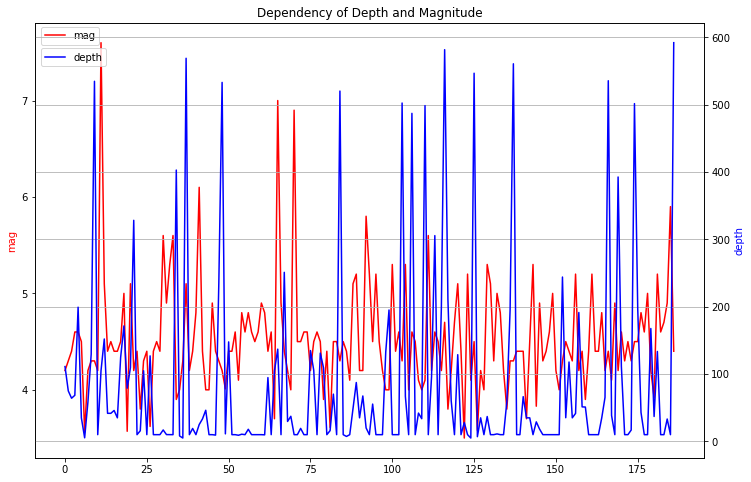

In [291]:
# Plotting the graph to show the relationship between the depth and magnitude of the earthquake
p = eq['mag'].values[::100]
q = eq['depth'].values[::100]
def plot_data(p,q, title="Dependency of Depth and Magnitude"):
    fig, ax1 = plt.subplots(figsize=(12, 8))
    plt.title(title)
    plt.plot(p, color='r')
    ax1.set_ylabel('mag', color='r')
    plt.legend(['mag'], loc=(0.01, 0.95))
    ax2 = ax1.twinx()
    plt.plot(q, color='b')
    ax2.set_ylabel('depth', color='b')
    plt.legend(['depth'], loc=(0.01, 0.9))
    plt.grid(True)

plot_data(p,q)

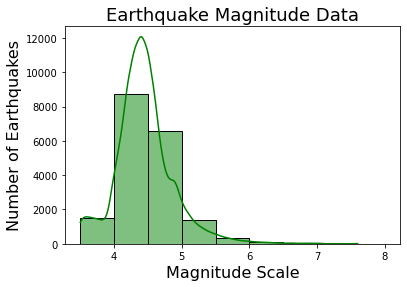

In [292]:
sns.histplot(data=eq['mag'], binwidth=0.5, kde=True,color="green")
plt.title('Earthquake Magnitude Data', fontsize=18)
plt.xlabel('Magnitude Scale', fontsize=16)
plt.ylabel('Number of Earthquakes', fontsize=16)
plt.gca().set_facecolor('none') # para tirar a linhas cizentas

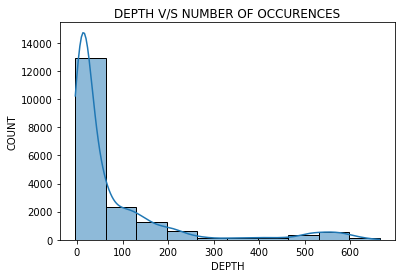

In [293]:
# plotting the graph to show the number of occurences of the quake with depth
sns.histplot(data=eq['depth'],bins=10, kde=True);
plt.title('DEPTH V/S NUMBER OF OCCURENCES')
plt.xlabel('DEPTH')
plt.ylabel('COUNT')
plt.show()

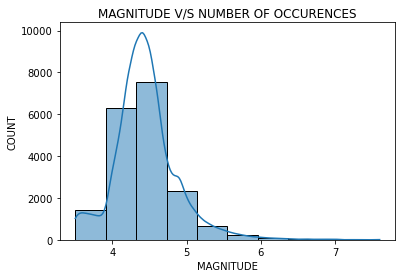

In [294]:
# Plotting the graph to show the magnitude of the earthquake and the number of occurences
sns.histplot(data=eq['mag'],bins=10, kde=True);
plt.title('MAGNITUDE V/S NUMBER OF OCCURENCES')
plt.xlabel('MAGNITUDE')
plt.ylabel('COUNT')
plt.show()

Text(0, 0.5, 'MAGNITUDE')

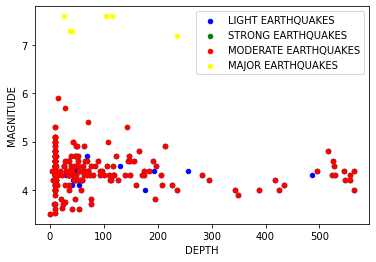

In [295]:
#visualization of the light, moderate and strong earthquakes
light=eq[eq['mag']<5.0][0:200]
moderate = eq[[eq['mag']>=5.0] and eq['mag']< 6.0][0:200]
strong=eq[[eq['mag']>=6.0] and eq['mag']< 7.0][0:200]
major = eq[eq['mag']> 7.0][0:200]

axes=light.plot(kind='scatter', x='depth', y='mag', color='blue', label='LIGHT EARTHQUAKES')
strong.plot(kind='scatter', x='depth', y='mag', color='green', label='STRONG EARTHQUAKES', ax=axes)
moderate.plot(kind='scatter', x='depth', y='mag', color='red', label='MODERATE EARTHQUAKES', ax=axes)
major.plot(kind='scatter', x='depth', y='mag', color='yellow', label='MAJOR EARTHQUAKES', ax=axes)

plt.xlabel('DEPTH')
plt.ylabel('MAGNITUDE')

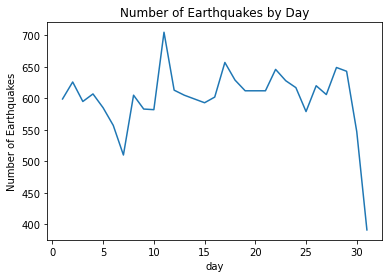

In [296]:
eq['day'] = pd.DatetimeIndex(eq['time']).day

# Group the data by year and count the number of earthquakes
eq_by_day = eq.groupby('day').size()

# Create a line chart showing the number of earthquakes by year
plt.plot(eq_by_day.index, eq_by_day.values)
plt.xlabel('day')
plt.ylabel('Number of Earthquakes')
plt.title('Number of Earthquakes by Day')
plt.show()

<AxesSubplot:>

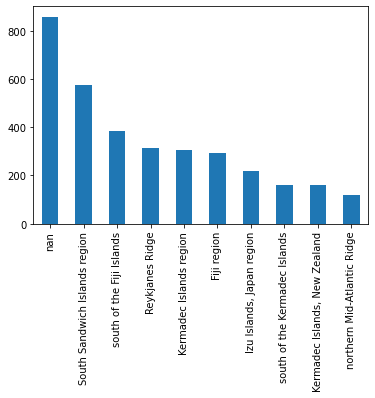

In [297]:
pd.Series(eq["place"]).value_counts()[:10].plot(kind="bar")

In [298]:
fig = px.scatter(eq, x='depth', y='mag',color='mag'
                 ,color_continuous_scale ='darkmint'
                 ,hover_name ='place'
                )
fig.update_layout(title='Earthquake Distribution (12 Dec 2022)',                   
                  title_x=0.5,
                  titlefont_size=16)
fig.show()

In [299]:
from sklearn.cluster import KMeans
# Extract the latitude, longitude, and magnitude columns
X = eq[['latitude', 'longitude', 'mag']]

# Fit a KMeans model to the data
kmeans = KMeans(n_clusters=4).fit(X)

# Add the cluster labels to the dataframe
eq['cluster'] = kmeans.labels_

# Create an interactive scatter plot showing the clusters of earthquakes
fig = px.scatter(eq, x='longitude', y='latitude', color='cluster', size='mag', hover_name='place', title='Earthquakes Clustered by Location and Magnitude')
fig.show()

In [300]:
fig = px.box(data_frame=eq, x= "mag",title= "Magnitude distribution")
fig.update_layout(xaxis_title= "Magnitude")
fig.show()

In [301]:
fig = px.histogram(data_frame=eq, x="time", title= "Number of earthquakes per year")
fig.show()

In [302]:
#!pip install geopandas



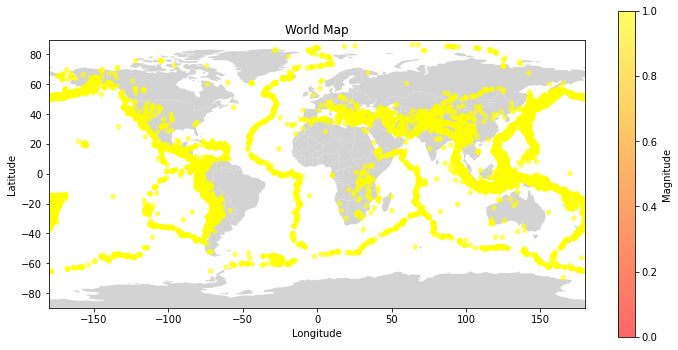

In [303]:
#Mapping the points on World's map
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(color="lightgrey", ax=ax)

# Plotting our Impact Energy data with a color map
x = eq['longitude']
y = eq['latitude']
z = (eq['mag'])>=3.0
plt.scatter(x, y, s=20*z, c=z, alpha=0.6, vmin=0,cmap='autumn')
plt.colorbar(label='Magnitude')

# Creating axis limits and title
plt.xlim([-180, 180])
plt.ylim([-90, 90])

first_year = eq["time"].min()
last_year = eq["time"].max()
plt.title('World Map')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

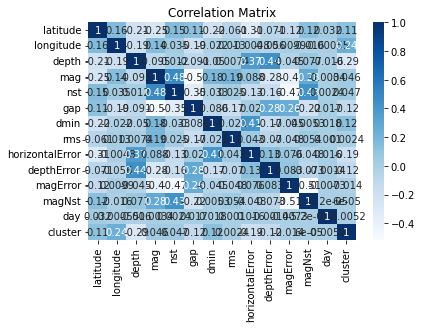

In [304]:
# correlation
sns.heatmap(eq.corr(),cmap = 'Blues', annot=True)
plt.title("Correlation Matrix")

## Linear Regression

In [305]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [306]:
eq.head()

time  latitude  longitude    depth  mag magType    nst  \
0  2023-01-31T21:51:19.853Z  -18.8950   -69.9048  111.094  4.2      mb   24.0   
1  2023-01-31T20:35:33.770Z  -25.3566  -177.4018  174.937  4.3      mb    8.0   
2  2023-01-31T20:32:41.243Z  -16.6312   168.2143   10.000  4.5      mb   12.0   
3  2023-01-31T20:04:35.543Z    9.0601   127.1036   10.000  4.8     mww  150.0   
4  2023-01-31T20:03:24.993Z  -16.6390   168.2483   10.000  4.6      mb   23.0   

     gap   dmin   rms  ... depthError magError magNst    status  \
0  115.0  0.489  0.55  ...      5.891    0.147   13.0  reviewed   
1  160.0  3.917  0.47  ...     47.878    0.266    4.0  reviewed   
2  128.0  1.527  0.50  ...      1.939    0.243    5.0  reviewed   
3   67.0  2.488  0.57  ...      1.752    0.089   12.0  reviewed   
4  138.0  1.554  0.84  ...      1.929    0.158   14.0  reviewed   

  locationSource  magSource        date  year  day cluster  
0             us         us  2023-04-13  2023   31       2  
1             us         us  2023-04-13  2023   31       0  
2             us         us  2023-04-13  2023   31       1  
3             us         us  2023-04-13  2023   31       1  
4             us         us  2023-04-13  2023   31       1  

[5 rows x 26 columns]

In [307]:
eq.shape

(18614, 26)

In [308]:
X = eq[['latitude', 'longitude', 'depth', 'gap', 'rms' ]]
y = eq['mag']

In [309]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [310]:
model = LinearRegression()

In [311]:
model.fit(X_train,y_train)

LinearRegression()

In [312]:
pred_y = model.predict(X_test)

In [313]:
print(pred_y)

[4.68112055 4.12778052 4.68111202 ... 4.58089606 4.40464843 4.61928094]


In [314]:
from sklearn import metrics

In [315]:
print(metrics.mean_absolute_error(y_test,pred_y))
print(metrics.mean_squared_error(y_test,pred_y))
print(np.sqrt(metrics.mean_absolute_error(y_test,pred_y)))

0.2594813760474443
0.12334484323575233
0.5093931448767683


In [316]:
score = model.score(X_test, y_test)
print(score)

0.3269328187743247


In [317]:
def accuracy(y_test, pred_y):
    errors = abs(y_test - pred_y)
    mape=100*np.mean(errors/y_test)
    accuracy=100-mape
    return accuracy 

accuracy(y_test,pred_y)

94.22447599961312

In [318]:
def predict_mag(latitude,longitude,depth, gap, rms):
    lat=  float(latitude)
    longi=float(longitude)
    dep = float(depth)
    gap = float(gap)
    rms = float(rms)
    
    

    x = [[lat , longi , dep, gap, rms]]
    

    return model.predict(x)

In [319]:
prediction = predict_mag(44.021,148.455,27.7, 115.0, 0.55)
print("Predicted magnitude is :",prediction)

Predicted magnitude is : [4.32939063]


C:\Users\Botham\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



## Random forest


In [320]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [321]:
X=eq[['latitude','longitude','depth']]
y=eq['mag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [322]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [323]:
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [324]:
print(y_pred)

[4.231 4.552 4.42  ... 4.897 4.316 4.789]


In [325]:
def predict_mag(latitude,longitude,depth):
    lat=  float(latitude)
    longi=float(longitude)
    dep = float(depth)
    

    x = [[lat , longi , dep]]
    

    return regressor.predict(x)

In [326]:
prediction = predict_mag(44.021,148.455,27.7)
print("Predicted magnitude is :",prediction)

Predicted magnitude is : [3.949]


In [327]:
if prediction < 5.0:
  print("Light")
elif (prediction >= 5.0 and prediction < 6.0):
  print("Moderate")
elif (prediction >= 6.0 and prediction < 7.0):
  print("Strong")
else:
  print("Major")

Light


In [328]:
# model evaluation for testing set

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.2759267295571125
MSE is 0.15094871282133115
R2 score is 0.18169973727983524


In [329]:
def accuracy(y_test, y_pred):
    errors = abs(y_test - y_pred)
    mape=100*np.mean(errors/y_test)
    accuracy=100-mape
    return accuracy 
accuracy(y_test,y_pred)

93.94386764481641

## Extra tree boost

In [330]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error , r2_score

In [331]:
X=eq[['latitude','longitude','depth']]
y=eq['mag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [332]:
from sklearn.ensemble import ExtraTreesRegressor

selection=ExtraTreesRegressor()
selection.fit(X_train,y_train)

ExtraTreesRegressor()

In [333]:
y_pred=selection.predict(X_test)

In [334]:
def predict_mag(latitude,longitude,depth):
    lat=  float(latitude)
    longi=float(longitude)
    dep = float(depth)
    

    x = [[lat , longi , dep]]
    .o

    return selection.predict(x)




prediction = predict_mag(44.021,148.455,27.7)
print("Predicted magnitude is :",prediction)
if prediction < 5.0:
  print("Light")
elif (prediction >= 5.0 and prediction < 6.0):
  print("Moderate")
elif (prediction >= 6.0 and prediction < 7.0):
  print("Strong")
else:
  print("Major")

Predicted magnitude is : [4.502]
Light


C:\Users\Botham\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names



In [335]:
MSE=mse(y_test, y_pred)
R_squared = r2_score(y_test, y_pred)
print(MSE)
print(R_squared)

0.16053390969104114
0.12973792210362944


In [336]:
def accuracy(y_test, y_pred):
    errors = abs(y_test - y_pred)
    mape=100*np.mean(errors/y_test)
    accuracy=100-mape
    return accuracy 
accuracy(y_test,y_pred)

93.74699849577908

## XG Boost

In [337]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [338]:
# Import libraries with standard conventions
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split


data = pd.read_csv("world1.csv")
X=data[['latitude','longitude','depth','mag']]

data = np.array(X)
print(data)
X = data[:, 0:-1]
y = data[:, -1]



# Making train and test sets for both X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, shuffle=True)

# Instantiate an XGBoost object with hyperparameters
xgb_reg = xgb.XGBRegressor(max_depth=3, n_estimators=100, n_jobs=2,
                           objectvie='reg:squarederror', booster='gbtree',
                           random_state=42, learning_rate=0.05)

# Train the model with train data sets
xgb_reg.fit(X_train, y_train)

y_pred = xgb_reg.predict(X_test) # Predictions
y_true = y_test # True values



[[ -18.895   -69.9048  111.094     4.2   ]
 [ -25.3566 -177.4018  174.937     4.3   ]
 [ -16.6312  168.2143   10.        4.5   ]
 ...
 [  38.7251   73.4827  105.79      4.2   ]
 [  -8.7633  124.3513  104.9       4.1   ]
 [ -17.0269 -174.2142   60.87      4.6   ]]
[14:47:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "objectvie" } are not used.



In [339]:
def predict_mag(latitude,longitude,depth):
    lat=  float(latitude)
    longi=float(longitude)
    dep = float(depth)
    

    x = [[lat , longi , dep]]
    

    return xgb_reg.predict(x)

In [340]:
prediction = predict_mag(30.646,83.791,10)
print("Predicted magnitude is :",prediction)
if prediction < 5.0:
  print("Light")
elif (prediction >= 5.0 and prediction < 6.0):
  print("Moderate")
elif (prediction >= 6.0 and prediction < 7.0):
  print("Strong")
else:
  print("Major")

Predicted magnitude is : [4.4550347]
Light


In [341]:
MAE=mae(y_test, y_pred)
MSE = mse(y_true, y_pred)
RMSE = np.sqrt(MSE)
R_squared = r2_score(y_true, y_pred)

print("MAE: ", np.round(MAE, 2))

print("MSE: ", np.round(MSE, 2))

print("R-Squared: ", np.round(R_squared, 2))




MAE:  0.26
MSE:  0.14
R-Squared:  0.21


In [342]:
def accuracy(y_test, y_pred):
    errors = abs(y_test - y_pred)
    mape=100*np.mean(errors/y_test)
    accuracy=100-mape
    return accuracy 
accuracy(y_test,y_pred)

94.26864917276508